In [1]:
from preprocessing import *
from main import *
import os
import shutil
if os.path.exists('model'):
    shutil.rmtree("model")

In [2]:
# set your device and visible devices, prefer cuda
os.environ["CUDA_VISIBLE_DEVICES"]="2"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'DEVICE: {device}')

# set your parameters based on hyperparameter tuning results
chf_best_params = {'depth': 3, 'grid': 8, 'k': 8, 'lamb': 3.3619635794339965e-07, 'lamb_entropy': 2.078997799175118, 'lr_1': 1.25, 'lr_2': 1.25, 'steps': 125}

# load your dataset from preprocessing
dataset = get_chf(cuda=True)

DEVICE: cuda


In [3]:
# define your NKAN object
chf_kan = NKAN(dataset, 42, device, chf_best_params)

checkpoint directory created: ./model
saving model version 0.0


In [4]:
# initialize and train your model
model = chf_kan.get_model(save=True, save_as='CHF_best')

description:   0%|                                                          | 0/125 [00:00<?, ?it/s]

| train_loss: 1.85e-03 | test_loss: 1.90e-03 | reg: 2.04e+01 | : 100%|█| 125/125 [01:49<00:00,  1.14


saving model version 0.1
Model trained.
saving model version 0.2


| train_loss: 1.71e-03 | test_loss: 1.68e-03 | reg: 1.56e+01 | : 100%|█| 125/125 [01:51<00:00,  1.12

saving model version 0.3
Model pruned and re-trained.


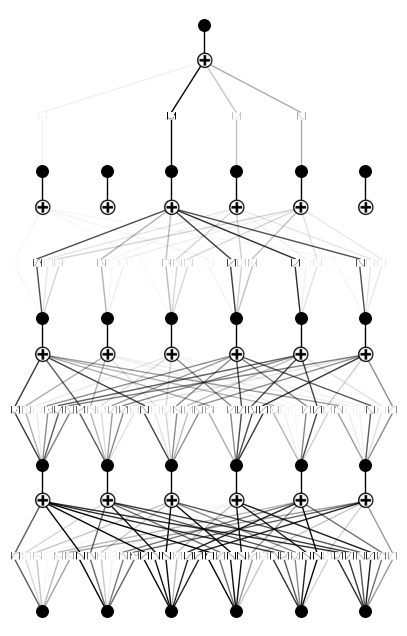

In [5]:
model.plot()

In [6]:
chf_kan.get_metrics(model, 'CHF_best')

,OUTPUT,MAE,MAPE,MSE,RMSE,RMSPE,R2
0,CHF,13.6049,1.019,494.009,22.2263,1.7303,0.9997


In [7]:
# do a quick refinement loop on your model 
#chf_kan.refine(model, grids=[15, 20, 30, 50])

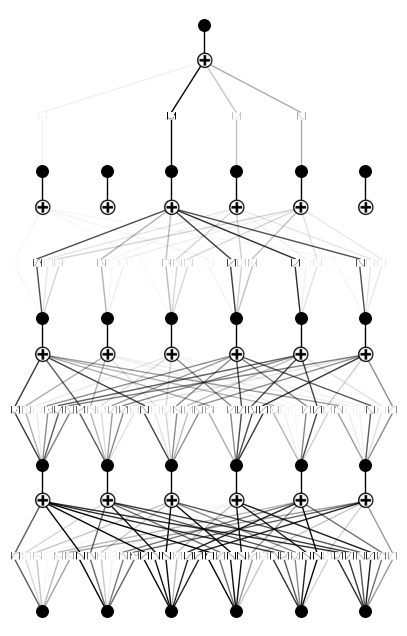

In [8]:
model.plot()

In [9]:
model.prune()

saving model version 0.4


MultKAN(
  (act_fun): ModuleList(
    (0-3): 4 x KANLayer(
      (base_fun): SiLU()
    )
  )
  (base_fun): SiLU()
  (symbolic_fun): ModuleList(
    (0-3): 4 x Symbolic_KANLayer()
  )
)

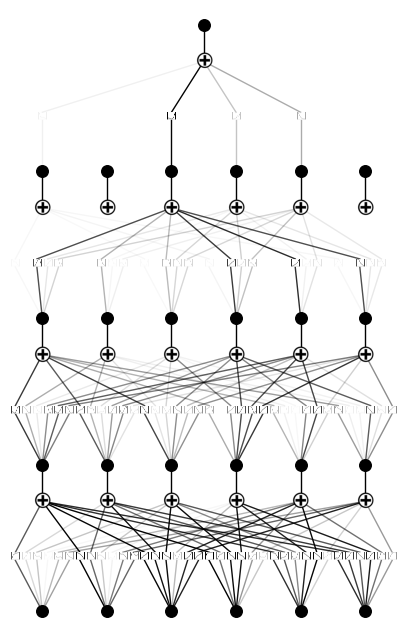

In [10]:
model.plot()

In [11]:
chf_kan.get_metrics(model, 'chf_notebook')

,OUTPUT,MAE,MAPE,MSE,RMSE,RMSPE,R2
0,CHF,94.0624,8.8585,9294.0653,96.4057,11.5732,0.9947


In [12]:
model = KAN.loadckpt('models/CHF_best')

In [13]:
chf_kan.get_metrics(model, 'CHF_reload')

,OUTPUT,MAE,MAPE,MSE,RMSE,RMSPE,R2
0,CHF,13.6049,1.019,494.009,22.2263,1.7303,0.9997


In [14]:
chf_kan.get_equation(model, 'CHF_best_s0', simple=0, metrics=True)

fixing (0,0,0) with tan, r2=0.9892647030654068, c=3
fixing (0,0,1) with gaussian, r2=0.973716481502661, c=3
fixing (0,0,2) with x^3, r2=0.9099647625923316, c=3
fixing (0,0,3) with tan, r2=0.5667605281662561, c=3
fixing (0,0,4) with x^5, r2=0.7381288280761746, c=3
fixing (0,0,5) with arctan, r2=0.9888149139017083, c=4
fixing (0,1,0) with tan, r2=0.9824611220062064, c=3
fixing (0,1,1) with arctan, r2=0.979646717866379, c=4
fixing (0,1,2) with 1/x^5, r2=0.6421728811625591, c=5
fixing (0,1,3) with tan, r2=0.6139120476053112, c=3
fixing (0,1,4) with tan, r2=0.9278497681384353, c=3
fixing (0,1,5) with gaussian, r2=0.9535311955259049, c=3
fixing (0,2,0) with tan, r2=0.996419582307247, c=3
fixing (0,2,1) with 1/x^2, r2=0.996179630712686, c=2
fixing (0,2,2) with tan, r2=0.9958999946071695, c=3
fixing (0,2,3) with gaussian, r2=0.9824704238201947, c=3
fixing (0,2,4) with tanh, r2=0.9982286209805321, c=3
fixing (0,2,5) with tan, r2=0.995758102555419, c=3
fixing (0,3,0) with 1/x^4, r2=0.99062881721

[5.03816183888393e+41*(-0.1699*((0.381 - x_4)**5 - 0.0463*tan(1.9623*x_3 - 4.1812) - 0.0046*tanh(10.0*x_5 - 4.68) + 0.0893*atan(2.7046*x_1 + 0.5914) + 0.0401 + 0.0732*exp(-70.56*(-x_2 - 0.0438)**2) - 0.1448*exp(-0.992*(0.7614 - x_6)**2))**5 + (-(0.5407 - x_1)**5 + 0.0076*cos(7.872*x_4 - 8.6184) + 0.0029*tan(3.0475*x_2 - 7.8111) + 0.05*tan(1.6749*x_5 + 5.5525) - 0.0524*tanh(1.796*x_3 - 1.6896) + 0.0317 - 0.0467*exp(-4.5622*(0.6059 - x_6)**2))**5)**10 + 1.68808763538721e+30*(-0.1699*((0.381 - x_4)**5 - 0.0463*tan(1.9623*x_3 - 4.1812) - 0.0046*tanh(10.0*x_5 - 4.68) + 0.0893*atan(2.7046*x_1 + 0.5914) + 0.0401 + 0.0732*exp(-70.56*(-x_2 - 0.0438)**2) - 0.1448*exp(-0.992*(0.7614 - x_6)**2))**5 + (-(0.5407 - x_1)**5 + 0.0076*cos(7.872*x_4 - 8.6184) + 0.0029*tan(3.0475*x_2 - 7.8111) + 0.05*tan(1.6749*x_5 + 5.5525) - 0.0524*tanh(1.796*x_3 - 1.6896) + 0.0317 - 0.0467*exp(-4.5622*(0.6059 - x_6)**2))**5)**8 + 0.0012]

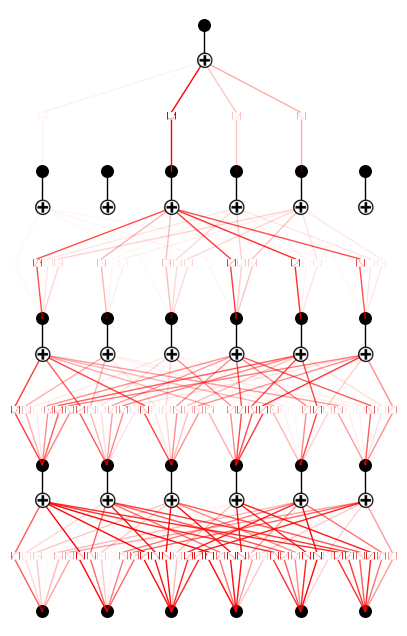

In [15]:
model.plot()